In [7]:
import geemap
import ee
import os
import pandas as pd
import rasterio
import geopandas as gpd
import rasterstats
import fiona

In [8]:
#ee.Authenticate()
# geemap.update_package()

In [9]:
#list of plots in GA LTER dataset (not including broad creek)

ee.Initialize()

Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [10]:
##Loading CSVs
##PC
in_csv = 'C:/Users/arj26323/Documents/Data/Biomass datasets/BMA.csv'
df = geemap.csv_to_pandas(in_csv)
df = df [['Date', 'Longitude', 'Latitude']]

##Load feature class
##PC
df_fc = 'C:/Users/arj26323/Documents/Data/Biomass datasets/BMA_fc.csv' ##Can only be done once file created; see below

bma_points = geemap.xy_to_points(df_fc, latitude = 'Latitude', longitude = 'Longitude')
Map.addLayer(bma_points, {}, 'BMA sampling locations')

In [11]:
print(df)
# print(df.dtypes)

      Date  Longitude   Latitude
0   29-Sep -81.289612  31.420226
1   29-Sep -81.289615  31.420161
2   29-Sep -81.289577  31.420091
3   29-Sep -81.289622  31.420043
4   29-Sep -81.289572  31.419946
..     ...        ...        ...
95  21-May -81.285426  31.390442
96  21-May -81.285451  31.390501
97  21-May -81.285515  31.390622
98  21-May -81.285523  31.390656
99  21-May -81.285584  31.390643

[100 rows x 3 columns]


In [12]:
##Load planetdata geotiff imagery
##PC
dean_may = r'E:/BMA planet data/21_May_2021/files/20210521_151835_36_2444_3B_AnalyticMS_SR_clip.tif'
dean_mar_a = r'E:/BMA planet data/22_Mar_2021/files/20210322_154607_103c_3B_AnalyticMS_SR_clip.tif'
dean_mar_b = r'E:/BMA planet data/22_Mar_2021/files/20210322_154608_103c_3B_AnalyticMS_SR_clip.tif'
dean_sep30_a = r'E:/BMA planet data/22_Mar_2021/files/20200930_154455_1011_3B_AnalyticMS_SR_clip.tif'
dean_sep30_b = r'E:/BMA planet data/22_Mar_2021/files/20200930_154456_1011_3B_AnalyticMS_SR_clip.tif'

dean_x = ee.Image(dean_may)

ls_x = r'C:/Users/arj26323/Downloads/landsat.tif'

Map.add_raster(dean_may, bands = [3, 2, 1], layer_name='May 2021') ##Not working-doesn't work if you manually load it either

Url()

In [13]:
dean_x

In [14]:
##Export CSV file - to then load as feature class
in_fc = df
out_dir = os.path.expanduser('~/Documents/Data/Biomass datasets')
out_csv = os.path.join(out_dir, 'BMA_fc.csv')
#df.to_csv('~/Documents/Data/Biomass datasets/BMA_fc.csv', index = False)
print(df)

      Date  Longitude   Latitude
0   29-Sep -81.289612  31.420226
1   29-Sep -81.289615  31.420161
2   29-Sep -81.289577  31.420091
3   29-Sep -81.289622  31.420043
4   29-Sep -81.289572  31.419946
..     ...        ...        ...
95  21-May -81.285426  31.390442
96  21-May -81.285451  31.390501
97  21-May -81.285515  31.390622
98  21-May -81.285523  31.390656
99  21-May -81.285584  31.390643

[100 rows x 3 columns]


In [40]:
##Using geopandas and rasterio to extract point data
##need to fix projection issue
pts = gpd.read_file('C:/Users/arj26323/Documents/Data/Biomass datasets/Shapefiles/yyy.shp')

pts = pts[['Latitude', 'Longitude', 'Date', 'geometry']]

pts.index = range(len(pts))
coords = [(x,y) for x, y in zip(pts.Latitude, pts.Longitude)]

src = rasterio.open(dean_may)
print(src.crs) ##In UTM! Might explain the discrepancy vs epsg 4326 in shapefile
print(src.count) ##Number of bands

pts['Raster Value'] = [x[0] for x in src.sample(coords)]

from rasterio.plot import show
import matplotlib.pyplot as plt
# show(src)

pts

##another way using rasterstats
# from rasterstats import point_query
# pts_new = point_query(pts, dean_may)
# pts['Band values'] = pts_new

pts

EPSG:32617
4


,Latitude,Longitude,Date,geometry,Raster Value
0,31.420226,-81.289612,29-Sep,POINT (-81.28961 31.42023),0
1,31.420161,-81.289615,29-Sep,POINT (-81.28962 31.42016),0
2,31.420091,-81.289577,29-Sep,POINT (-81.28958 31.42009),0
3,31.420043,-81.289622,29-Sep,POINT (-81.28962 31.42004),0
4,31.419946,-81.289572,29-Sep,POINT (-81.28957 31.41995),0
...,...,...,...,...,...
95,31.390442,-81.285426,21-May,POINT (-81.28543 31.39044),0
96,31.390501,-81.285451,21-May,POINT (-81.28545 31.39050),0
97,31.390622,-81.285515,21-May,POINT (-81.28551 31.39062),0
98,31.390656,-81.285523,21-May,POINT (-81.28552 31.39066),0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-81.28961199999998 31.420225600000038
-81.28961519999996 31.420161000000064
-81.28957699999995 31.420091300000024
-81.28962209999997 31.42004330000003
-81.28957219999995 31.419945900000073
-81.28982549999995 31.41956250000004
-81.28985929999999 31.41954480000004
-81.28983519999997 31.419522700000073
-81.28979819999995 31.419490100000075
-81.28974809999994 31.41962120000005
-81.29079839999997 31.420470100000045
-81.29081369999994 31.420484500000043
-81.29089199999999 31.420511300000044
-81.29090079999997 31.420522900000037
-81.29096069999997 31.420575000000042
-81.29244219999998 31.420443100000057
-81.29246509999996 31.420408200000054
-81.29249769999996 31.420384300000023
-81.29255019999994 31.420353800000044
-81.29257439999998 31.420356800000036
-81.29177279999999 31.42015200000003
-81.29178409999997 31.42012820000008
-81.29178509999997 31.420096200000046
-81.29180329999997 31.420083500000032
-81.29180359999998 31.420059200000026
-81.28961199999998 31.420225600000038
-81.28961519999996

NameError: name 'row' is not defined

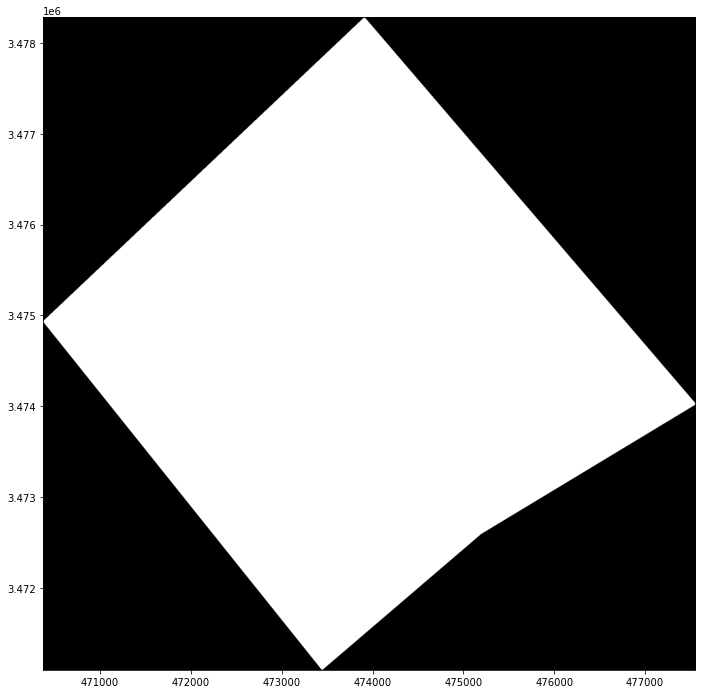

In [37]:
##Plotting above
fig, ax = plt.subplots(figsize = (12,12))
pts.plot(ax = ax)
show(src, ax = ax)

for point in pts['geometry']:
    print(point.xy[0][0], point.xy[1][0])
    
for point in pts['geometry']:
    x = point.xy[0][0]
    y = point.xy[1][0]
    row

In [17]:
##Organizing planet imagery for Acolite

# import os, shutil

# ##PC path
# path = (r"E:\BMA planet data\acolite_data\files\DN files")

# os.chdir(path)

# for f in os.listdir(path):
#     folderName = f[:15]
    
#     if not os.path.exists(folderName):
#         os.mkdir(folderName)
#         shutil.copy(os.path.join(path, f), folderName)
#     else:
#         shutil.copy(os.path.join(path, f), folderName)

In [18]:
##Bulk processing planet imagery for Acolite

indir = r'E:\BMA planet data\acolite_data\files\DN files' ##full path to your directory with files

output = r'E:\BMA planet data\acolite_data\acolite_output' ## path to put output files

path_to_acolite_mr = r'C:\Users\arj26323\Documents\acolite_mr' ## path to cloned github acolite_mr code

## import packages and acolite

import sys, os, glob

sys.path.append(path_to_acolite_mr)

import acolite as ac

## make a list of directories in the given indir path

files = glob.glob('{}/*/'.format(indir))

files.sort()

print('Found {} folders in {}.'.format(len(files), indir))

## additional keywords can be provided to acolite_mr_ac

limit=None ## process full scene, provide a 4 element list with [S, E, N, W] coordinates for processing a ROI

ancillary_data=False ## don't get ancillary MET and gas data

## run through each folder that was found

for file in files:
    print('Trying {}'.format(file))
    ac.acolite.acolite_mr_ac(file, output=output, ancillary_data=ancillary_data, limit=limit,export_geotiff=True)

Found 2 folders in E:\BMA planet data\acolite_data\files\DN files.
Trying E:\BMA planet data\acolite_data\files\DN files\20210521_151835\
20210521_151835_36_2444_3B_AnalyticMS_DN_clip.tif
20210521_151835_36_2444_3B_AnalyticMS_DN_metadata_clip.xml
20210521_151835_36_2444_3B_AnalyticMS_DN_udm_clip.tif
20210521_151835_36_2444_3B_udm2_clip.tif
Processing planet file
20210521_151835_36_2444_3B_AnalyticMS_DN_clip.tif
20210521_151835_36_2444_3B_AnalyticMS_DN_metadata_clip.xml
20210521_151835_36_2444_3B_AnalyticMS_DN_udm_clip.tif
20210521_151835_36_2444_3B_udm2_clip.tif


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [7]:
import rasterio
src = rasterio.open('E:/BMA planet data/21_May_2021/files/20210521_151835_36_2444_3B_AnalyticMS_SR_clip.tif')
src

<open DatasetReader name='E:/BMA planet data/21_May_2021/files/20210521_151835_36_2444_3B_AnalyticMS_SR_clip.tif' mode='r'>